In [ ]:
import os
import cv2
import json
import pickle
import numpy as np
import pandas as pd
import gymnasium as gym
import seaborn as sns
import matplotlib.pyplot as plt

from training import record_agent
from agents import CarRacingAgent
from utils import read_json_files_from_folder, make_video_frames, plot_all_frames

# Results
---

In [3]:
df = read_json_files_from_folder()
df['max_reward'] = df['episode_rewards'].apply(max)
df['min_reward'] = df['episode_rewards'].apply(min)
df['median_reward'] = df['episode_rewards'].apply(np.median)
df['std_reward'] = df['episode_rewards'].apply(np.std)
df['avg_reward'] = df['episode_rewards'].apply(np.mean)
df = df.sort_values(by='avg_reward', ascending=False)
df

,agent_name,training_time,action_space,use_rgb,bin_size,n_episodes,n_runs,episode_rewards,filename,max_reward,min_reward,median_reward,std_reward,avg_reward
3,rgb_False_bin_64_n_50000,4.18,discrete,False,64,196,50000,"[-50.81967213114832, -60.65573770491892, -54.0...",episode_rewards_rgb_False_bin_64_n_50000.json,37.123746,-69.969970,-25.266904,18.749884,-28.379851
16,rgb_False_bin_32_n_50000,4.33,discrete,False,32,197,50000,"[-54.09836065573847, -63.93442622950907, -57.3...",episode_rewards_rgb_False_bin_32_n_50000.json,252.941176,-65.189873,-29.936306,28.035832,-29.051694
8,rgb_False_bin_64_n_100000,8.43,discrete,False,64,397,100000,"[-57.37704918032874, -57.37704918032875, -50.8...",episode_rewards_rgb_False_bin_64_n_100000.json,81.159420,-91.165886,-34.256055,25.911933,-31.503289
17,rgb_False_bin_32_n_100000,8.45,discrete,False,32,396,100000,"[-54.09836065573852, -50.81967213114815, -57.3...",episode_rewards_rgb_False_bin_32_n_100000.json,79.389313,-75.975976,-43.275499,26.857348,-36.468504
9,rgb_False_bin_32_n_25000,2.13,discrete,False,32,96,25000,"[-57.37704918032863, -54.098360655738574, -54....",episode_rewards_rgb_False_bin_32_n_25000.json,-13.194444,-59.595960,-35.064935,10.900529,-37.053845
4,rgb_False_bin_32_n_10000,0.87,discrete,False,32,36,10000,"[-54.098360655738475, -57.37704918032875, -54....",episode_rewards_rgb_False_bin_32_n_10000.json,-12.408759,-59.595960,-40.112147,12.882671,-39.246376
13,rgb_False_bin_64_n_25000,2.12,discrete,False,64,96,25000,"[-54.09836065573853, -57.377049180328704, -47....",episode_rewards_rgb_False_bin_64_n_25000.json,-6.015038,-66.966967,-38.689894,15.376517,-39.362361
2,rgb_True_bin_64_n_50000,4.37,discrete,True,64,196,50000,"[-54.09836065573842, -63.934426229509086, -63....",episode_rewards_rgb_True_bin_64_n_50000.json,20.437956,-69.945355,-40.592220,13.665301,-41.429005
14,rgb_True_bin_64_n_10000,0.92,discrete,True,64,36,10000,"[-54.09836065573859, -60.65573770491887, -57.3...",episode_rewards_rgb_True_bin_64_n_10000.json,-28.813559,-60.655738,-45.355191,8.744480,-44.052604
0,rgb_False_bin_64_n_1000,0.08,discrete,False,64,4,1000,"[-60.65573770491876, -47.54098360655782, -44.2...",episode_rewards_rgb_False_bin_64_n_1000.json,-40.983607,-60.655738,-45.901639,7.467569,-48.360656


# Results comparative metrics
---

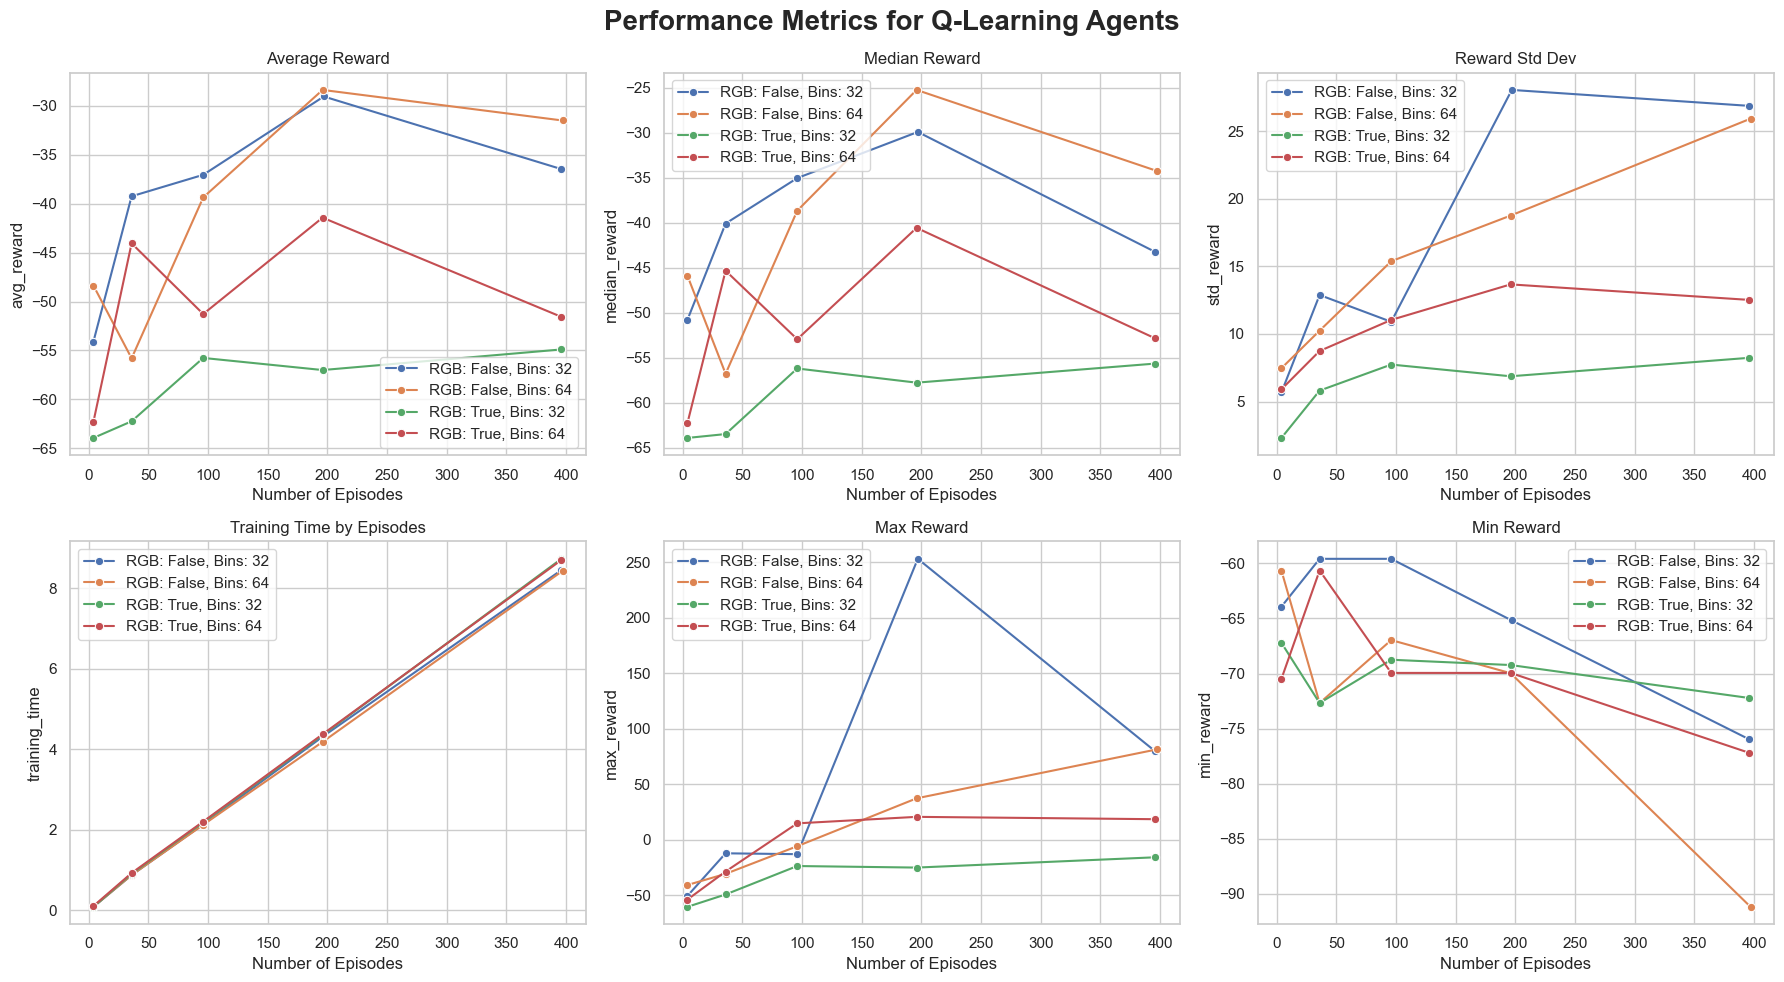

In [7]:
grouped = df.groupby(['use_rgb', 'bin_size'])
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics = ['avg_reward', 'median_reward', 'std_reward', 'training_time', 'max_reward', 'min_reward',]
titles = ['Average Reward',  'Median Reward', 'Reward Std Dev','Training Time by Episodes', 
          'Max Reward', 'Min Reward', 
          ]

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    for (use_rgb, bin_size), group_data in grouped:
        label = f"RGB: {use_rgb}, Bins: {bin_size}"
        group_data_sorted = group_data.sort_values('n_episodes')
        x = group_data_sorted['n_episodes']
        sns.lineplot(x=x, y=group_data_sorted[metric], marker='o', label=label, ax=ax)

    ax.set_title(titles[i])
    ax.set_xlabel('Number of Episodes')
    ax.legend()
plt.suptitle('Performance Metrics for Q-Learning Agents', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('results/q_learning_performance_metrics.svg', dpi=300, bbox_inches='tight')
plt.show()


# Best agent video
---

In [ ]:
rgb = False
bin_size = 32
n_episodes = 50_000

agent = CarRacingAgent(
    num_actions=5,
    learning_rate=0.01,
    initial_epsilon=1.0,
    epsilon_decay=1.0 / (n_episodes / 2),
    final_epsilon=0.1,
    use_rgb=rgb,
    bin_size=bin_size
)

pickle_path = "results/trained_agent_rgb_False_bin_32_n_50000.pkl"

agent.load(pickle_path)

record_agent(agent, num_episodes=n_episodes, agent_name='trained_agent_rgb_False_bin_32_n_50000')

## Frames of videos


In [5]:
video_path = 'results/videos/trained_agent_rgb_False_bin_32_n_50000.mp4'
make_video_frames(video_path)

Saved 34 frames to 'results/frames_output'


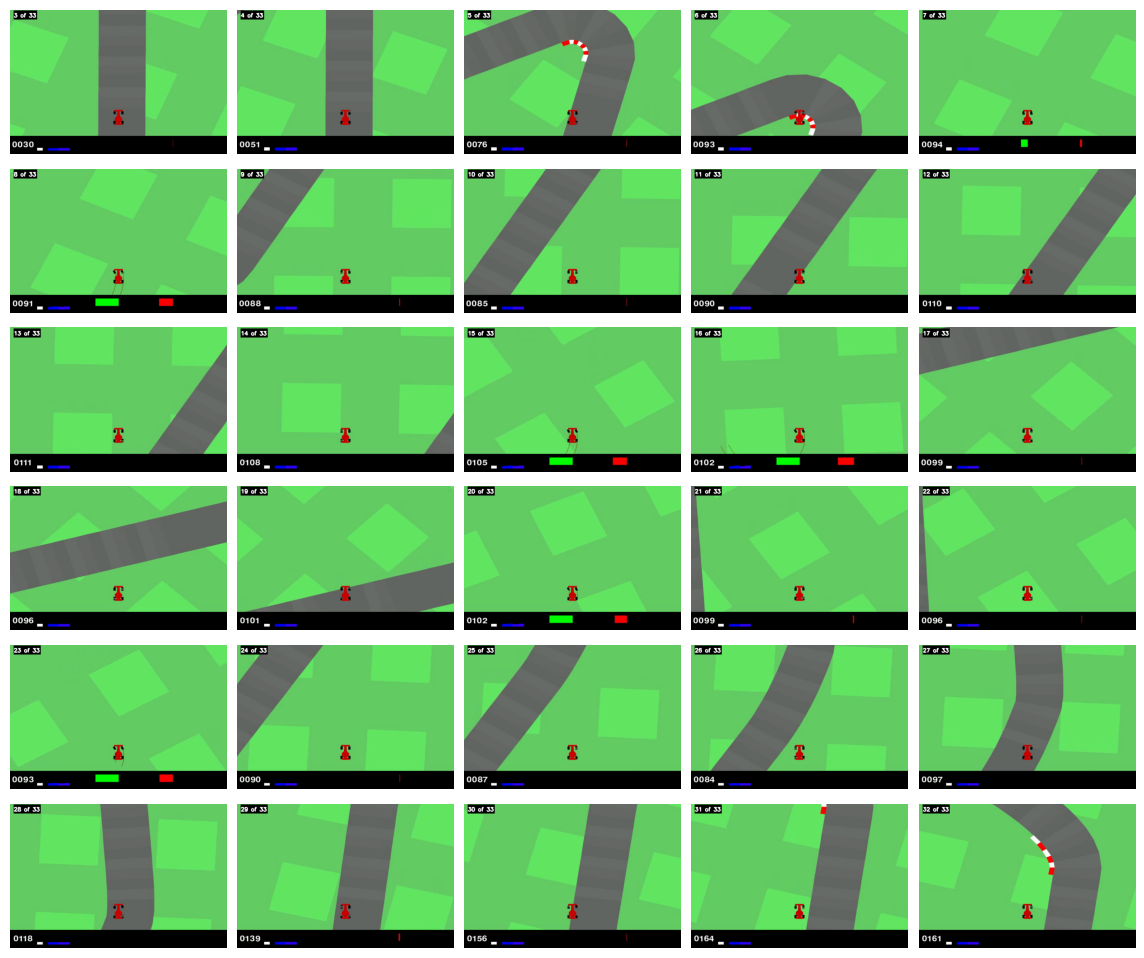

In [6]:
plot_all_frames('results/frames_output', total_frames=33, cols=5, skip_first=3)
